# Sample building data

### Load images

In [2]:
import rasterio

# main folder
_train = r'..\data\spacenet_sample\AOI_2_Vegas_Train'


# geojson
_geo = r'\geojson\buildings\buildings_AOI_2_Vegas_img'
# '.geojson'

# MUL 8-Band Multi-Spectral 
_8bands = r'\MUL\MUL_AOI_2_Vegas_img'

# MUL-PanSharpen 8-Band Multi-Spectral 
_MulPan =  r'\MUL-PanSharpen\MUL-PanSharpen_AOI_2_Vegas_img'

# PAN
_Pan =  r'\PAN\PAN_AOI_2_Vegas_img'

# RGB
_RGB = r'\RGB-PanSharpen\RGB-PanSharpen_AOI_2_Vegas_img'

# '.tif'

# summaryData
_sum = r'\summaryData\AOI_2_Vegas_Train_Building_Solutions.csv'

# images
images = [r'225',r'246',r'802',r'1265',r'1385',r'1488',r'2144',r'2636',r'5184',r'5874']

ds8bands = rasterio.open(_train+_8bands+images[0]+'.tif')
print(ds8bands.read(1))
print(ds8bands.count)
print(ds8bands.width)
print(ds8bands.height)
print(ds8bands.bounds)

print('')

dsMulPan = rasterio.open(_train+_MulPan+images[0]+'.tif')
print(dsMulPan.count)
print(dsMulPan.width)
print(dsMulPan.height)
print(dsMulPan.bounds)

print('')

dsPan = rasterio.open(_train+_Pan+images[0]+'.tif')
print(dsPan.count)
print(dsPan.width)
print(dsPan.height)
print(dsPan.bounds)

print('')

dsRGB = rasterio.open(_train+_RGB+images[0]+'.tif')
print(dsRGB.read(1))
print(dsRGB.count)
print(dsRGB.width)
print(dsRGB.height)
print(dsRGB.bounds)

[[374 243 230 ... 227 334 364]
 [345 231 218 ... 209 283 332]
 [340 216 224 ... 194 259 331]
 ...
 [199 201 212 ... 265 234 199]
 [219 218 222 ... 271 251 205]
 [218 209 208 ... 210 221 227]]
8
163
163
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)

8
650
650
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)

1
650
650
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)

[[674 627 566 ... 487 506 524]
 [669 644 551 ... 487 512 589]
 [667 641 566 ... 520 509 545]
 ...
 [127 115 181 ... 249 229 221]
 [151 211 267 ... 264 219 177]
 [145 130 160 ... 219 196 169]]
3
650
650
BoundingBox(left=-115.3004976, bottom=36.1335626997, right=-115.2987426, top=36.1353176997)


### Look at the extremum value of the images. It's uint16 rather than uint8

In [20]:
b = dsRGB.read(1)
print(b.max())
print(b.min())

b = dsRGB.read(2)
print(b.max())
print(b.min())

b = dsRGB.read(3)
print(b.max())
print(b.min())

# It is uint16, so the maximum value is 65535
# Somehow, they are very dark and the maximym is only 1817

1537
1
1817
71
1267
82


### Plot an example of an image

#### RGB

(650, 650, 3)


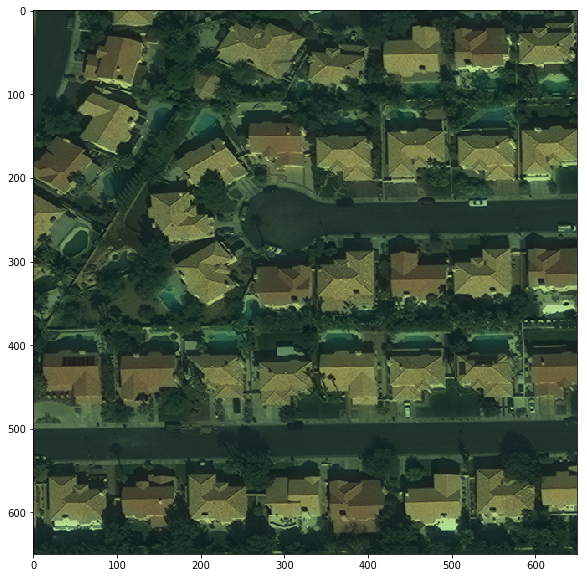

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
plt.figure(figsize=(12, 10))
m = (np.rollaxis(np.array([dsRGB.read(1),dsRGB.read(2),dsRGB.read(3)]),0,3)/2000)
print(m.shape)

plt.imshow(m);

#### Pan

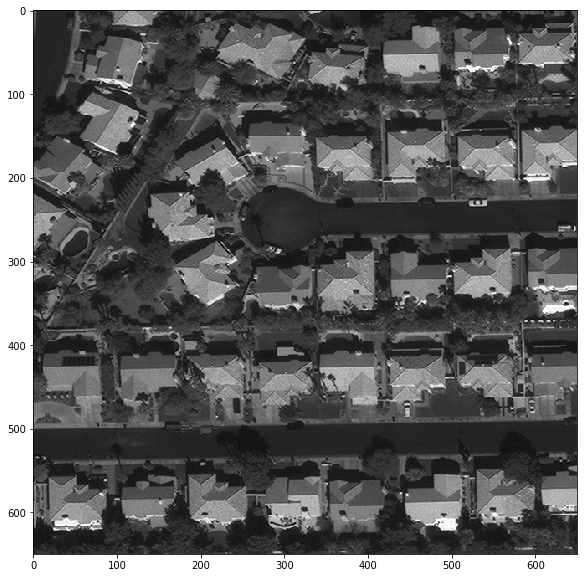

In [55]:
dsPan
plt.figure(figsize=(12, 10))
m = dsPan.read(1)/2000
plt.imshow(m, cmap='gray');

### Summary file, it contains the coordinate of each building

In [30]:
import pandas as pd

df = pd.read_csv(_train+_sum)
df.head()

,ImageId,BuildingId,PolygonWKT_Pix,PolygonWKT_Geo
0,AOI_2_Vegas_img2144,1,"POLYGON ((571.34 510.8 0,496.2 516.23 0,500.02...",POLYGON ((-115.246304971999962 36.198873544000...
1,AOI_2_Vegas_img2144,2,"POLYGON ((627.03 560.04 0,623.45 575.78 0,642....",POLYGON ((-115.246154624999974 36.198740595000...
2,AOI_2_Vegas_img2144,3,"POLYGON ((625.08 493.14 0,619.17 510.61 0,612....",POLYGON ((-115.246159889999902 36.198921227000...
3,AOI_2_Vegas_img2144,4,"POLYGON ((650.0 555.14 0,650.0 545.56 0,646.99...",POLYGON ((-115.246092599877571 36.198753830681...
4,AOI_2_Vegas_img2144,5,"POLYGON ((633.23 397.99 0,610.57 459.43 0,650....",POLYGON ((-115.246137888999954 36.199178125000...


### Use geojson mask

It seems to mostly keep the buildings, but there are also 2 small rectangles at line 400, so it doesn't seem to be perfect

(3, 620, 650)
(620, 650, 3)


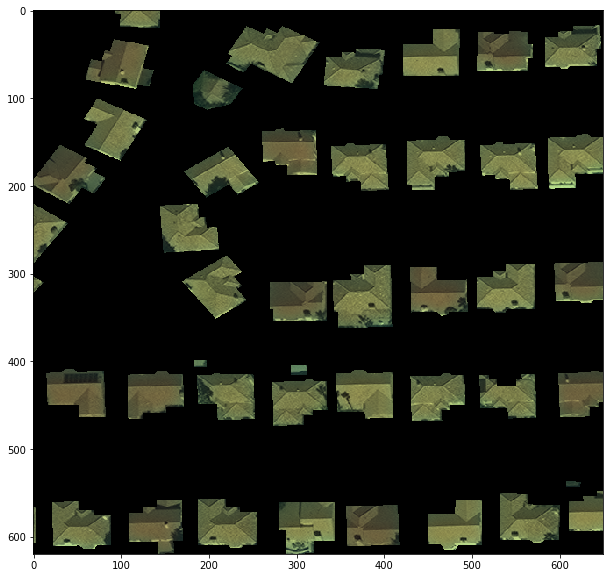

In [17]:
# use geojson
from rasterio.tools.mask import mask
import json

with open(_train+_geo+images[0]+'.geojson') as data_file:
        data = json.loads(data_file.read())
#
 
geoms = [d['geometry'] for d in data['features']]
out_image, out_transform = mask(dsRGB, geoms, crop=True) 

print(out_image.shape)
out_image = np.rollaxis(out_image,0,3)/2000
print(out_image.shape)
plt.figure(figsize=(12, 10))
plt.imshow(out_image);

0


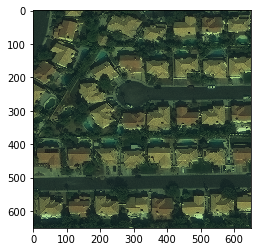

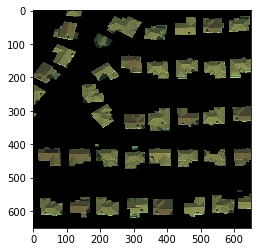

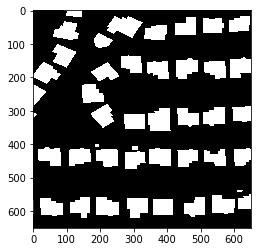

 
1


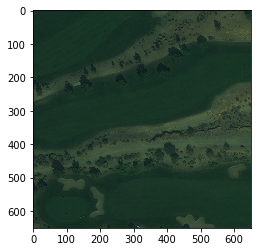

unable to get mask
 
2


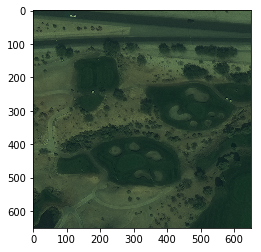

unable to get mask
 
3


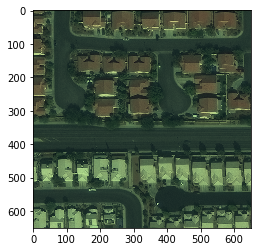

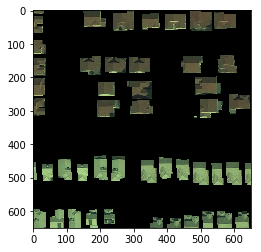

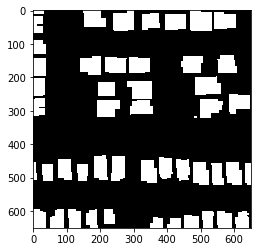

 
4


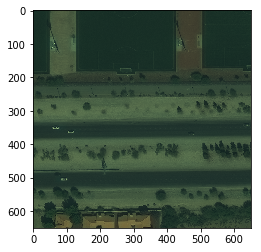

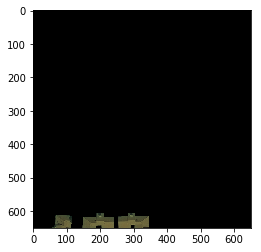

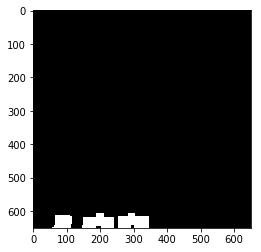

 
5


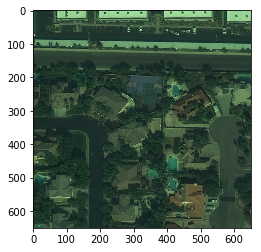

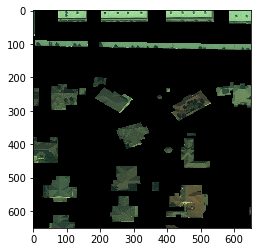

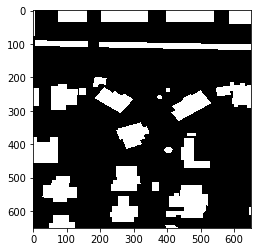

 
6


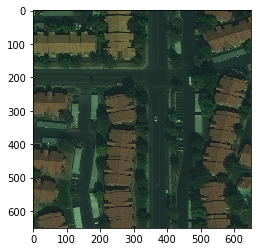

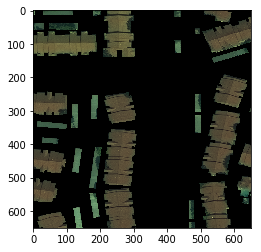

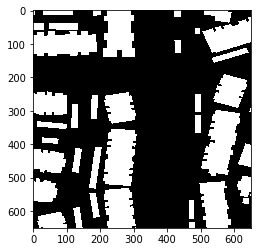

 
7


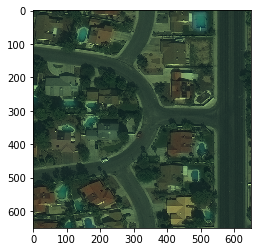

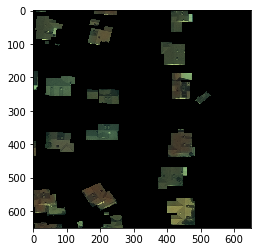

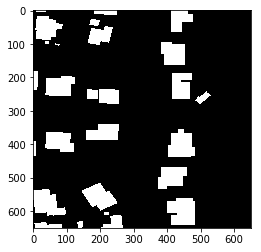

 
8


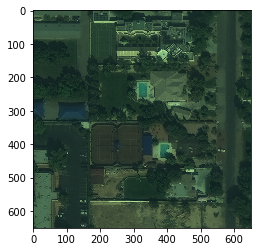

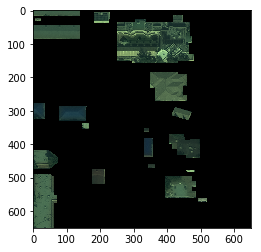

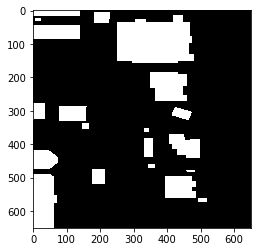

 
9


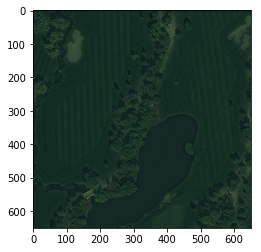

unable to get mask
 


In [32]:
for image in range(10):
    print(image)
    ds = rasterio.open(_train+_RGB+images[image]+'.tif')
    m = (np.rollaxis(np.array([ds.read(1),ds.read(2),ds.read(3)]),0,3)/2000)
    plt.imshow(m)
    plt.show()
    with open(_train+_geo+images[image]+'.geojson') as data_file:
        data = json.loads(data_file.read())
 
    geoms = [d['geometry'] for d in data['features']]
    try:
        out_image, out_transform = mask(ds, geoms) 
        out_image = np.rollaxis(out_image,0,3)/2000
        plt.imshow(out_image)
        plt.show() 
        Mask = out_image != 0
        Mask = Mask.astype('uint8')*255
        plt.imshow(Mask)
        plt.show()
    except ValueError: 
        print('unable to get mask')
    print(' ')

### Prepare data for machine learning

It is probably better to use 8-bands data since it contains more information

I'm not sure if we should use 8bands or MulPan. Both of them are 8bands, but MulPan has been Pansharpenned, which increase the size in x and y. Those larger images might contain more information, but being bigger, it will take longer to use them in machine learning

Pansharpening is a process of merging high-resolution panchromatic and lower resolution multispectral imagery to create a single high-resolution color image. So the real images are the ones call Pan and Mul (8bands) where Pan is high resolution and Mul is low resolution. MulPan is an artificial combination of the 2. RGB is processed to look like real image.

Pansharpenned images are the best for maps, but it's not clear it's best for machine learning. We could use 8bands and MulPan separately, it would need less data (one can combine them after using Convolution on the high resolution Pan)

x shape is: 10 images, 8 bands, 163x163 in xy coordinates. It is normalized with a mean of 0 and a std of 1.

y shape is: 10 images, 163x163 in xy coordinates. It is True when there is a building and False when there is no building

In [35]:
x = np.array([np.array([rasterio.open(_train+_8bands+images[image]+'.tif').read(i) for i in range(1,9)]) 
                     for image in range(10)])
x = (x - x.mean()) / x.std()
print(x.shape, x.mean(), x.std())

# 10 images, 8 color bands, 163 pixels in x and y.

(10, 8, 163, 163) 1.0798944510517086e-16 1.0000000000000002


In [54]:
def f(image):
    ds = rasterio.open(_train+_8bands+images[image]+'.tif')
    with open(_train+_geo+images[image]+'.geojson') as data_file:
        data = json.loads(data_file.read())
 
    geoms = [d['geometry'] for d in data['features']]
    try:
        out_image, out_transform = mask(ds, geoms)
        return np.array(out_image != 0)[0,...] # All bands have the same mask, so I use only the 1st band mask.
    except ValueError:
        return np.zeros_like(ds.read(1), dtype=bool) # no mask, so False everywhere

y = np.array([f(i) for i in range(10)])
print(y.shape)

(10, 163, 163)


# Road data

Test public doesn't have target output. If there is no way to summit it because the competition is finished, then it is useless.

Size on memory is 1.61 MB for Mul, 3.22 MB for Pan

For 1319 images, that's 6.4 GB

For train only (989), that's 4.8 GB

In [2]:
import os
import re

train_images = [re.search(r'img(\d*)',i).group(1) for i in os.listdir(r'..\data\AOI_2_Vegas_Roads_Train\MUL')]
test_images = [re.search(r'img(\d*)',i).group(1) for i in os.listdir(r'..\data\AOI_2_Vegas_Roads_Test_Public\MUL')]
print(train_images[:10])
print(len(train_images))
print(len(test_images))

['1', '10', '100', '1001', '1002', '1003', '1008', '1012', '1014', '1015']
989
330


In [3]:
# On a first iteration I got a JSONDecodeError with the images: ['1159','1448','1488','1534','200','234','286','42']
# Since it is bad to train for images on which I don't have a target, I will remove them.

no_geojson = set(['1159','1448','1488','1534','200','234','286','42'])
train_images = list(set(train_images)-no_geojson)
print(len(train_images))

981


In [4]:
import rasterio
from rasterio.tools.mask import mask
import json
import numpy as np

# main folder
_train = r'..\data\AOI_2_Vegas_Roads_Train'
_test = r'..\data\AOI_2_Vegas_Roads_Test_Public'
# geojson
_geo = r'\geojson\spacenetroads\spacenetroads_AOI_2_Vegas_img'
# MUL 8-Band Multi-Spectral 
_8bands = r'\MUL\MUL_AOI_2_Vegas_img'
# PAN
_Pan =  r'\PAN\PAN_AOI_2_Vegas_img'

If I need to save again the images with some change, I can use the same list of random states: [453  15 901  40 772 530 384 869 820 726]

In [5]:
from sklearn.model_selection import train_test_split

def g(choiceOfImage, nbands, images):
    # Use train mean and std to normalize since test is supposed to be as if we didn't have access to it.
    x = np.array([np.array([rasterio.open(_train+choiceOfImage+image+'.tif').read(i) for i in range(1,nbands+1)]) 
                         for image in images])
    mean = x.mean()
    std = x.std()
    return x, mean, std

def ceildiv(a, b):
    return -(-a // b)

nBatch = 10
# create list of random state for each batch
rand = np.random.randint(0, 1000, size=(nBatch,))
print('list of random states: rand =', rand)
batchsize = ceildiv(len(train_images), nBatch)
MeanMul = 0
StdMul = 0
MeanPan = 0
StdPan = 0
xMulVal = []
xPanVal = []
for batch in range(nBatch):
    images = train_images[batch*batchsize:(batch+1)*batchsize]
    print(batch)
    xMul, meanMul, stdMul = g(_8bands,8,images)
    print(xMul.shape, meanMul, stdMul)
    xMul, xMul0 = train_test_split(xMul, test_size = 0.1, random_state=rand[batch])
    xMulVal.append(xMul0)
    np.save(r'..\data\xMul'+str(batch),xMul)
    xPan, meanPan, stdPan = g(_Pan,1,images)
    print(xPan.shape, meanPan, stdPan)
    xPan, xPan0 = train_test_split(xPan, test_size = 0.1, random_state=rand[batch])
    np.save(r'..\data\xPan'+str(batch),xPan)
    xPanVal.append(xPan0)
    
    MeanMul += meanMul*len(images)
    StdMul += stdMul*len(images)
    MeanPan += meanPan*len(images)
    StdPan += stdPan*len(images)

MeanMul = MeanMul/len(train_images)
StdMul = StdMul/len(train_images)
MeanPan = MeanPan/len(train_images)
StdPan = StdPan/len(train_images)

print(MeanMul, StdMul, MeanPan, StdPan)
# will use those values to normalize the data

np.save(r'..\data\xMulVal',np.concatenate(xMulVal))
np.save(r'..\data\xPanVal',np.concatenate(xPanVal))

list of random states: rand = [453  15 901  40 772 530 384 869 820 726]
0
(99, 8, 325, 325) 425.9979948359333 265.214070209048
(99, 1, 1300, 1300) 547.394779361664 308.45488478392116
1
(99, 8, 325, 325) 407.3730554419939 275.8257056306709
(99, 1, 1300, 1300) 524.0224285577671 325.302058313731
2
(99, 8, 325, 325) 401.2653725539418 271.9964666251498
(99, 1, 1300, 1300) 516.6828425557349 321.26132597216844
3
(99, 8, 325, 325) 405.1543129639591 275.9684775383967
(99, 1, 1300, 1300) 519.793846171777 324.5181695510899
4
(99, 8, 325, 325) 431.20917921224077 278.64667658494005
(99, 1, 1300, 1300) 555.7551759548144 328.5431004307964
5
(99, 8, 325, 325) 422.3928124081047 272.0841848138258
(99, 1, 1300, 1300) 544.031080288088 319.7662149550736
6
(99, 8, 325, 325) 429.77128087980395 265.14586018652045
(99, 1, 1300, 1300) 553.7927896718666 309.8094297536279
7
(99, 8, 325, 325) 393.13816228557766 270.4643064829192
(99, 1, 1300, 1300) 504.6180350367581 318.6999743389599
8
(99, 8, 325, 325) 398.919256

In [7]:
def f(image, _train):
    ds1300 = rasterio.open(_train+_Pan+image+'.tif')
    ds325 = rasterio.open(_train+_8bands+image+'.tif')
    #print(_train+_geo+image+'.geojson')
    with open(_train+_geo+image+'.geojson') as data_file:
        try:
            data = json.loads(data_file.read())
        except json.decoder.JSONDecodeError:
            print('JSONDecodeError', image)
            return np.zeros(ds325.shape, dtype=bool), np.zeros(ds1300.shape, dtype=bool)  # no mask, so False everywhere
    geoms = [d['geometry'] for d in data['features']]
    try:
        out325, _ = mask(ds325, geoms)
        out1300, _ = mask(ds1300, geoms)
        return np.array(out325 != 0)[0,...], np.array(out1300 != 0)[0,...] # All bands have the same mask, so I use only the 1st band mask.
    except ValueError:
        return np.zeros(ds325.shape, dtype=bool), np.zeros(ds1300.shape, dtype=bool) # no mask, so False everywhere

y325 = []   
y1300 = [] 
for i in train_images:
    tmp = f(i, _train)
    y325.append(tmp[0])
    y1300.append(tmp[1])
    
y325 = np.array(y325)
y1300 = np.array(y1300)
print(y325.shape, y1300.shape)

(981, 325, 325) (981, 1300, 1300)


Previously I got
- JSONDecodeError 1159
- JSONDecodeError 1448
- JSONDecodeError 1488
- JSONDecodeError 1534
- JSONDecodeError 200
- JSONDecodeError 234
- JSONDecodeError 286
- JSONDecodeError 42

In [8]:
def ybatch(size, y):
    yVal = []
    for batch in range(nBatch):
        y0, y1 = train_test_split(y[batch*batchsize:(batch+1)*batchsize], test_size = 0.1, random_state=rand[batch])
        yVal.append(y1)
        np.save(r'..\data\y'+size+'_'+str(batch),y0)
    np.save(r'..\data\yVal'+size,np.concatenate(yVal))
    
ybatch('325', y325)
ybatch('1300', y1300)

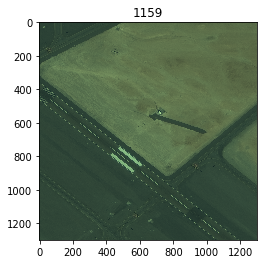

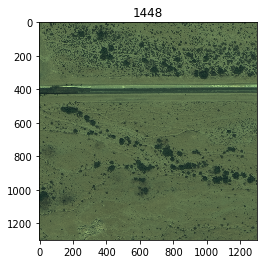

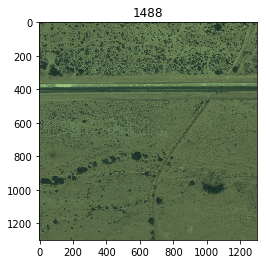

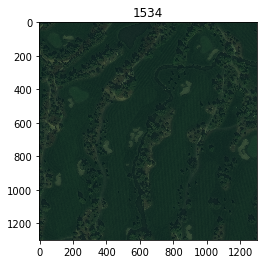

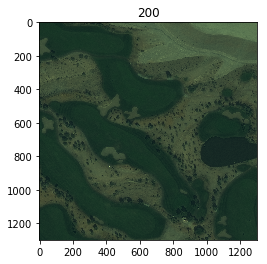

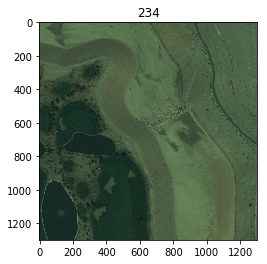

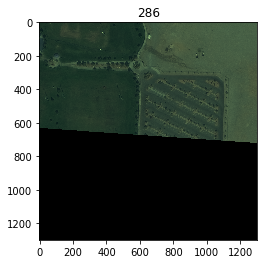

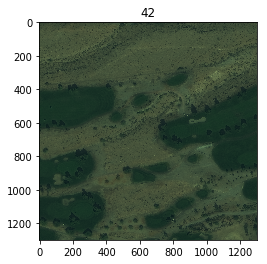

In [97]:
# look at images with problem with their json

_RGB = r'\RGB-PanSharpen\RGB-PanSharpen_AOI_2_Vegas_img'
for image in ['1159','1448','1488','1534','200','234','286','42']:
    ds = rasterio.open(_train+_RGB+image+'.tif')
    m = (np.rollaxis(np.array([ds.read(1),ds.read(2),ds.read(3)]),0,3)/2000)
    plt.imshow(m)
    plt.title(image)
    plt.show()

The size is 1300x1300 for everything but the Pan that are 325x325. All information is contained by 1x1300x1300 + 8x325x325. The 8x1300x1300 and 3x1300x1300 are processed image, for the first they upsampled the values and then multiplied each pixel by a value such that the luminosity correspond to the one of 1x1300x1300. For RGB, they do a transformation from the 8-band space to the RGB space.

# Transform road data

I should widden the roads to make it easier to learn

I should split the images in smaller part

### First look at the road images